# Filtering: Print reduced dimensions

In [2]:
# Reload modules every time before executing the Python code typed
%load_ext autoreload
%autoreload 2

# Import from project root
import sys; sys.path.insert(0, '../')

#from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

from access.file_storage import FileStorage
from access.interim_storage import InterimStorage
#from amore.amazon_reviews_reader import AmazonReviewsReader
#from amore.printer import Printer

KEY_NUMBER = 0
#KEY_YEAR   = 1
#KEY_STAR   = 2

In [3]:
file_storage = FileStorage()
#printer = Printer()

In [4]:
def count_ysl(ysl):
    c = 0
    for year in ysl.keys():
        for star in ysl[year].keys():
            c += len(ysl[year][star])
    return c

## Read data

### Read year star tuples

In [5]:
# Read cache
ys_lists = InterimStorage('deduplicated').read()
all_years = list(ys_lists.keys())
all_stars = list(ys_lists[all_years[0]].keys())

print(all_years, all_stars)
print('Reviews in ys_lists:', count_ysl(ys_lists))
# [2007, 2006, 2008, 2003, 2002, 2004, 2000, 2009, 2011, 2010, 2001, 2005, 2012, 1999, 1998, 1997] [3, 5, 4, 1, 2]
# Reviews in ys_lists: 1,727,821

[2007, 2006, 2008, 2003, 2002, 2004, 2000, 2009, 2011, 2010, 2001, 2005, 2012, 1999, 1998, 1997] [3, 5, 4, 1, 2]
Reviews in ys_lists: 1727821


### Read deduplicated reviews

In [4]:
# Read cache
two_dim = InterimStorage('tsvd').read()
print('Reviews in two_dim:', len(two_dim))
# Reviews in two_dim: 1,727,821

Reviews in two_dim: 1203682


In [8]:
two_dim_umap = InterimStorage('umap').read()
print('Reviews in two_dim_umap:', len(two_dim_umap))
# Reviews in two_dim_umap: 1,203,682

Reviews in two_dim: 1203682


In [6]:
countvec_tsvd = InterimStorage('countvec-tsvd').read()
print('Reviews in countvec_tsvd:', len(countvec_tsvd))
# Reviews in two_dim_umap: 1,203,682

Reviews in countvec_tsvd: 1203682


In [18]:
countvec_umap = InterimStorage('countvec-umap').read()
print('Reviews in countvec_umap:', len(countvec_tsvd))
# Reviews in countvec_umap: 1,203,682

Reviews in countvec_umap: 1203682


## Plot

In [8]:
def get_points(years, stars, two_dim, ys_lists):
    results = {}
    not_found = 0
    for year in ys_lists.keys():
        if year in years:
            for star in ys_lists[year].keys():
                if star in stars:
                    for tup in ys_lists[year][star]:
                        if(tup[KEY_NUMBER] in two_dim.keys()):
                            results[tup[KEY_NUMBER]] = two_dim[tup[KEY_NUMBER]]
                        else:
                            not_found += 1
    print(len(results), years, stars, not_found)
    return results

In [12]:
def plot_points(points, axis=None):
    # one-liner: plt.scatter(*zip(*dict_.values()))
    if axis is not None:
        plt.axis(axis)
    for pointset in points:
        x = [x[0] for x in pointset[0]]
        y = [y[1] for y in pointset[0]]
        plt.scatter(x, y, alpha=0.1, label=pointset[1])
    plt.legend(loc='upper left');
    plt.show()

In [10]:
stars_neg = [1,2]
stars_pos = [4,5]
stars_posneg = stars_neg + stars_pos
years_2006_2012 = list(range(2006,2012+1))

## TSVD

1033959 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [4, 5] 0
169723 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [1, 2] 0


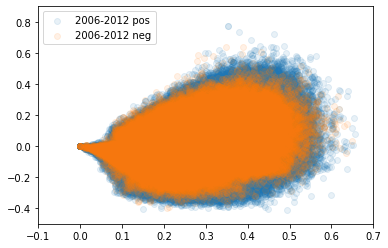

In [110]:
points_2006_2012_pos = get_points(years_2006_2012, stars_pos, two_dim, ys_lists)
points_2006_2012_neg = get_points(years_2006_2012, stars_neg, two_dim, ys_lists)
plot_points([
    (points_2006_2012_pos.values(), '2006-2012 pos'),
    (points_2006_2012_neg.values(), '2006-2012 neg')], axis=[-0.1, 0.7, -0.5, 0.9])

175099 [2012] [4, 5] 0
33611 [2012] [1, 2] 0


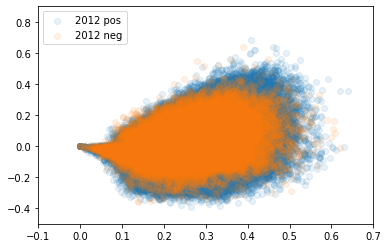

In [111]:
points_2012_pos = get_points([2012], stars_pos, two_dim, ys_lists)
points_2012_neg = get_points([2012], stars_neg, two_dim, ys_lists)
plot_points([
    (points_2012_pos.values(), '2012 pos'),
    (points_2012_neg.values(), '2012 neg')], axis=[-0.1, 0.7, -0.5, 0.9])

99536 [2006] [4, 5] 0
16993 [2006] [1, 2] 0


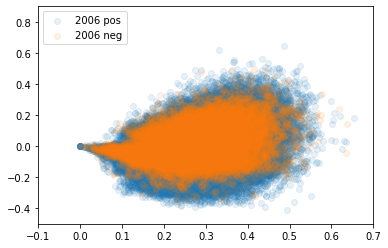

In [112]:
points_2012_pos = get_points([2006], stars_pos, two_dim, ys_lists)
points_2012_neg = get_points([2006], stars_neg, two_dim, ys_lists)
plot_points([
    (points_2012_pos.values(), '2006 pos'),
    (points_2012_neg.values(), '2006 neg')], axis=[-0.1, 0.7, -0.5, 0.9])

## UMAP

1033959 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [4, 5] 0
169723 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [1, 2] 0


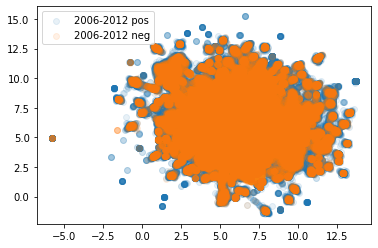

In [23]:
points_2006_2012_pos = get_points(years_2006_2012, stars_pos, two_dim_umap, ys_lists)
points_2006_2012_neg = get_points(years_2006_2012, stars_neg, two_dim_umap, ys_lists)
plot_points([
    (points_2006_2012_pos.values(), '2006-2012 pos'),
    (points_2006_2012_neg.values(), '2006-2012 neg')], axis=[-7.5, 15, -2.5, 17])

175099 [2012] [4, 5] 0
33611 [2012] [1, 2] 0


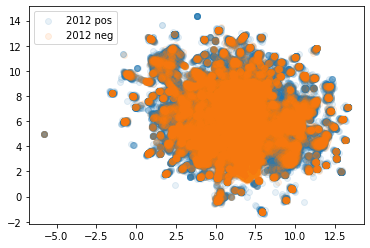

In [24]:
points_2012_pos = get_points([2012], stars_pos, two_dim_umap, ys_lists)
points_2012_neg = get_points([2012], stars_neg, two_dim_umap, ys_lists)
plot_points([
    (points_2012_pos.values(), '2012 pos'),
    (points_2012_neg.values(), '2012 neg')], axis=[-7.5, 15, -2.5, 17])

99536 [2006] [4, 5] 0
16993 [2006] [1, 2] 0


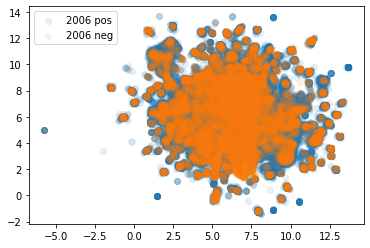

In [25]:
points_2012_pos = get_points([2006], stars_pos, two_dim_umap, ys_lists)
points_2012_neg = get_points([2006], stars_neg, two_dim_umap, ys_lists)
plot_points([
    (points_2012_pos.values(), '2006 pos'),
    (points_2012_neg.values(), '2006 neg')], axis=[-7.5, 15, -2.5, 17])

## CountVec TSVD

1033959 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [4, 5] 0
169723 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [1, 2] 0


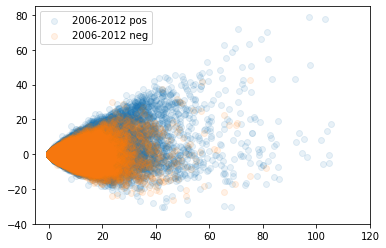

In [14]:
points_2006_2012_pos = get_points(years_2006_2012, stars_pos, countvec_tsvd, ys_lists)
points_2006_2012_neg = get_points(years_2006_2012, stars_neg, countvec_tsvd, ys_lists)
plot_points([
    (points_2006_2012_pos.values(), '2006-2012 pos'),
    (points_2006_2012_neg.values(), '2006-2012 neg')], axis=[-5, 120, -40, 85])

175099 [2012] [4, 5] 0
33611 [2012] [1, 2] 0


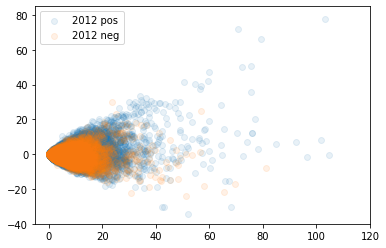

In [15]:
points_2012_pos = get_points([2012], stars_pos, countvec_tsvd, ys_lists)
points_2012_neg = get_points([2012], stars_neg, countvec_tsvd, ys_lists)
plot_points([
    (points_2012_pos.values(), '2012 pos'),
    (points_2012_neg.values(), '2012 neg')], axis=[-5, 120, -40, 85])

99536 [2006] [4, 5] 0
16993 [2006] [1, 2] 0


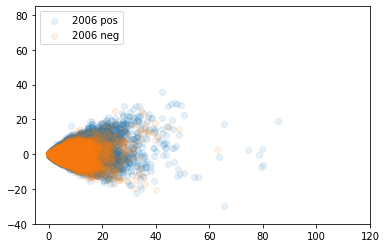

In [17]:
points_2012_pos = get_points([2006], stars_pos, countvec_tsvd, ys_lists)
points_2012_neg = get_points([2006], stars_neg, countvec_tsvd, ys_lists)
plot_points([
    (points_2012_pos.values(), '2006 pos'),
    (points_2012_neg.values(), '2006 neg')], axis=[-5, 120, -40, 85])

## CountVec UMAP

1033959 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [4, 5] 0
169723 [2006, 2007, 2008, 2009, 2010, 2011, 2012] [1, 2] 0


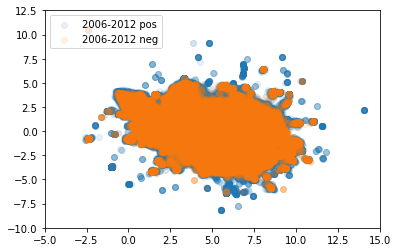

In [21]:
points_2006_2012_pos = get_points(years_2006_2012, stars_pos, countvec_umap, ys_lists)
points_2006_2012_neg = get_points(years_2006_2012, stars_neg, countvec_umap, ys_lists)
plot_points([
    (points_2006_2012_pos.values(), '2006-2012 pos'),
    (points_2006_2012_neg.values(), '2006-2012 neg')], axis=[-5, 15, -10, 12.5])

175099 [2012] [4, 5] 0
33611 [2012] [1, 2] 0


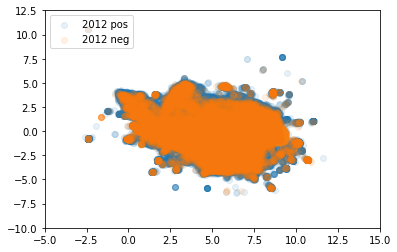

In [23]:
points_2012_pos = get_points([2012], stars_pos, countvec_umap, ys_lists)
points_2012_neg = get_points([2012], stars_neg, countvec_umap, ys_lists)
plot_points([
    (points_2012_pos.values(), '2012 pos'),
    (points_2012_neg.values(), '2012 neg')], axis=[-5, 15, -10, 12.5])

99536 [2006] [4, 5] 0
16993 [2006] [1, 2] 0


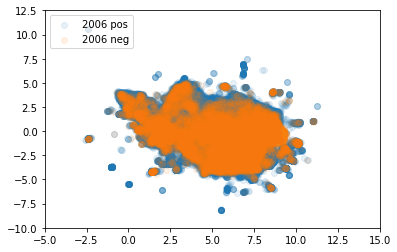

In [24]:
points_2012_pos = get_points([2006], stars_pos, countvec_umap, ys_lists)
points_2012_neg = get_points([2006], stars_neg, countvec_umap, ys_lists)
plot_points([
    (points_2012_pos.values(), '2006 pos'),
    (points_2012_neg.values(), '2006 neg')], axis=[-5, 15, -10, 12.5])